In [1]:
import numpy as np
import pandas as pd

# Load and preprocess
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv').to_numpy()
m, n = data.shape

# Shuffle & split
np.random.shuffle(data)
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n] / 255.0
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n] / 255.0

# Activation functions
def ReLU(z):
    return np.maximum(0, z)

def derivative_relu(Z):
    return Z > 0

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

# One-hot encoding
def one_hot(Y):
    one_hot_Y = np.zeros((Y.max() + 1, Y.size))
    one_hot_Y[Y, np.arange(Y.size)] = 1
    return one_hot_Y

# Initialize parameters
def init_params():
    w1 = np.random.randn(10, 784) * 0.01
    b1 = np.zeros((10, 1))
    w2 = np.random.randn(10, 10) * 0.01
    b2 = np.zeros((10, 1))
    return w1, b1, w2, b2

# Forward propagation
def forward_prop(w1, b1, w2, b2, X):
    Z1 = w1.dot(X) + b1
    a1 = ReLU(Z1)
    Z2 = w2.dot(a1) + b2
    a2 = softmax(Z2)
    return Z1, a1, Z2, a2

# Backward propagation
def back_prop(Z1, a1, a2, w2, Y, X):
    m = X.shape[1]
    one_hot_Y = one_hot(Y)
    dz2 = a2 - one_hot_Y
    dw2 = (1/m) * dz2.dot(a1.T)
    db2 = (1/m) * np.sum(dz2, axis=1, keepdims=True)
    dz1 = w2.T.dot(dz2) * derivative_relu(Z1)
    dw1 = (1/m) * dz1.dot(X.T)
    db1 = (1/m) * np.sum(dz1, axis=1, keepdims=True)
    return dw1, db1, dw2, db2

# Update parameters
def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1 -= alpha * dw1
    b1 -= alpha * db1
    w2 -= alpha * dw2
    b2 -= alpha * db2
    return w1, b1, w2, b2

# Prediction and accuracy
def get_prediction(a2):
    return np.argmax(a2, axis=0)

def get_accuracy(predictions, Y):
    return np.mean(predictions == Y)

# Training loop
def gradient_descent(X, Y, iterations, alpha):
    w1, b1, w2, b2 = init_params()
    for i in range(iterations):
        Z1, a1, Z2, a2 = forward_prop(w1, b1, w2, b2, X)
        dw1, db1, dw2, db2 = back_prop(Z1, a1, a2, w2, Y, X)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        
        if i % 10 == 0:
            acc = get_accuracy(get_prediction(a2), Y)
            print(f"Iteration {i}: Accuracy = {acc:.4f}")
    return w1, b1, w2, b2

# Run training
w1, b1, w2, b2 = gradient_descent(X_train, Y_train, iterations=500, alpha=0.1)


Iteration 0: Accuracy = 0.0745
Iteration 10: Accuracy = 0.1544
Iteration 20: Accuracy = 0.1745
Iteration 30: Accuracy = 0.2356
Iteration 40: Accuracy = 0.2751
Iteration 50: Accuracy = 0.2433
Iteration 60: Accuracy = 0.2433
Iteration 70: Accuracy = 0.3572
Iteration 80: Accuracy = 0.4608
Iteration 90: Accuracy = 0.5839
Iteration 100: Accuracy = 0.6264
Iteration 110: Accuracy = 0.6410
Iteration 120: Accuracy = 0.6592
Iteration 130: Accuracy = 0.6828
Iteration 140: Accuracy = 0.7094
Iteration 150: Accuracy = 0.7337
Iteration 160: Accuracy = 0.7561
Iteration 170: Accuracy = 0.7756
Iteration 180: Accuracy = 0.7928
Iteration 190: Accuracy = 0.8077
Iteration 200: Accuracy = 0.8199
Iteration 210: Accuracy = 0.8287
Iteration 220: Accuracy = 0.8369
Iteration 230: Accuracy = 0.8440
Iteration 240: Accuracy = 0.8495
Iteration 250: Accuracy = 0.8542
Iteration 260: Accuracy = 0.8580
Iteration 270: Accuracy = 0.8619
Iteration 280: Accuracy = 0.8648
Iteration 290: Accuracy = 0.8671
Iteration 300: Accura

In [2]:
import matplotlib.pyplot as plt


def make_predictions(X, w1, b1, w2, b2):
    _, _, _, a2 = forward_prop(w1, b1, w2, b2, X)
    return get_prediction(a2)

def test_prediction(index, w1, b1, w2, b2):
    current_image = X_train[:, index, None]  # keep column shape
    prediction = make_predictions(current_image, w1, b1, w2, b2)
    label = Y_train[index]
    
    print(f"Prediction: {prediction}")
    print(f"Label: {label}")
    
    # show the digit
    image = current_image.reshape((28, 28)) * 255
    plt.imshow(image, cmap='gray', interpolation='nearest')
    plt.show()



Prediction: [6]
Label: 6


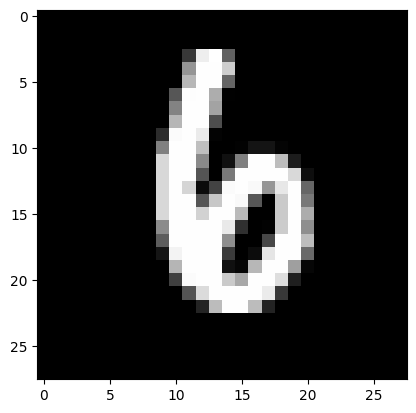

In [3]:
test_prediction(99,w1,b1,w2,b2)